## Exploring independent datasets

### Questions of interest:
- How is the data accessed (freely available or by special request, requires special status, etc.)?
- Data frequency (Daily/Monthly/Annually/Other)
- Data lag (e.g. data may be annual – but there may be a lag of 2 years before it is available)
- Are data “complete” when published or are there usually revisions after publication?
- If revised, how often and at what point are data “final”?
- Source of data (administrative records, sample survey, etc.)
- What portion of the population does this cover?  (not necessarily a specific percentage – but as an example, vehicle registration only covers those who own a vehicle and register it – so not a complete coverage of the population)
- Characteristics provided in the data (e.g. do the data provide demographic characteristics such as race, ethnicity, gender, age)?
- Other limitations
- General description
- Cost


## Change of Address Data

Reflections
- Freely accessible and free of cost
- By every US city per year and month (2018-2022)
- Total change of address requests to and from a ZIP code by month and year
- Broken down by move type: Business, Family, and Individual

Limitations: Cities where the count is below 11 are not included so adding across type may not add to the total

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt

df = pd.read_csv(
    "../00_source_data/independent_datasets/change_of_add_2020.csv", low_memory=False
)
df

,YYYYMM,ZIPCODE,CITY,STATE,TOTAL FROM ZIP,TOTAL BUSINESS,TOTAL FAMILY,TOTAL INDIVIDUAL,TOTAL PERM,TOTAL TEMP,TOTAL TO ZIP,TOTAL BUSINESS.1,TOTAL FAMILY.1,TOTAL INDIVIDUAL.1,TOTAL PERM.1,TOTAL TEMP.1
0,202001,"=""00601""",ADJUNTAS,PR,13,0,0,0,13,0,0,0,0,0,0,0
1,202001,"=""00602""",AGUADA,PR,25,0,0,16,25,0,40,0,0,27,34,0
2,202001,"=""00603""",AGUADILLA,PR,45,0,15,27,40,0,63,0,15,45,49,14
3,202001,"=""00605""",AGUADILLA,PR,13,0,0,0,12,0,18,0,0,12,17,0
4,202001,"=""00610""",ANASCO,PR,20,0,0,20,19,0,21,0,0,18,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289333,202012,"=""99901""",KETCHIKAN,AK,111,11,34,66,92,19,104,0,27,67,83,21
289334,202012,"=""99921""",CRAIG,AK,33,0,12,20,23,0,0,0,0,0,0,0
289335,202012,"=""99925""",KLAWOCK,AK,18,0,12,0,0,0,0,0,0,0,0,0
289336,202012,"=""99928""",WARD COVE,AK,13,0,0,0,0,0,0,0,0,0,0,0


In [2]:
# checking how many NAs are in each column
for col in df.columns:
    # printing the total number of NAs in each column
    na_sum = df[col].isna().sum()
    # printing number of NAs if not 0
    if na_sum != 0:
        print(col, ":", df[col].isna().sum())

In [3]:
# subsetting for NC
nc = df[df["STATE"] == "NC"]
nc

,YYYYMM,ZIPCODE,CITY,STATE,TOTAL FROM ZIP,TOTAL BUSINESS,TOTAL FAMILY,TOTAL INDIVIDUAL,TOTAL PERM,TOTAL TEMP,TOTAL TO ZIP,TOTAL BUSINESS.1,TOTAL FAMILY.1,TOTAL INDIVIDUAL.1,TOTAL PERM.1,TOTAL TEMP.1
5914,202001,"=""27006""",ADVANCE,NC,80,0,28,52,74,0,76,0,30,43,70,0
5915,202001,"=""27007""",ARARAT,NC,14,0,0,0,14,0,0,0,0,0,0,0
5916,202001,"=""27009""",BELEWS CREEK,NC,12,0,0,0,12,0,0,0,0,0,0,0
5917,202001,"=""27011""",BOONVILLE,NC,33,0,0,24,33,0,36,0,0,30,35,0
5918,202001,"=""27012""",CLEMMONS,NC,191,16,65,110,180,11,207,12,64,131,192,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272172,202012,"=""28902""",BRASSTOWN,NC,18,0,0,0,14,0,19,0,0,0,17,0
272173,202012,"=""28904""",HAYESVILLE,NC,87,0,48,32,58,29,90,0,41,47,75,15
272174,202012,"=""28905""",MARBLE,NC,26,0,0,21,21,0,24,0,0,17,20,0
272175,202012,"=""28906""",MURPHY,NC,209,0,88,114,140,69,198,11,64,123,155,43


Text(0, 0.5, 'Total Individuals')

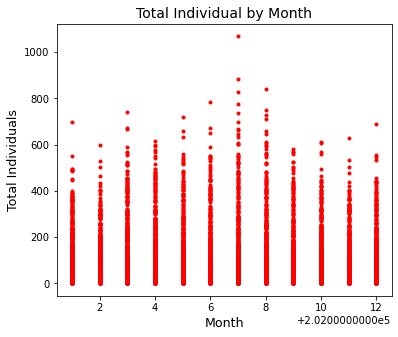

In [4]:
# ploting
plt.figure(figsize=(6, 5))
plt.plot(nc["YYYYMM"], nc["TOTAL INDIVIDUAL"], "r.")
plt.title("Total Individual by Month", fontsize=14)
plt.xlabel("Month", fontsize=12.6)
plt.ylabel("Total Individuals", fontsize=12.6)

Text(0, 0.5, 'Total Family')

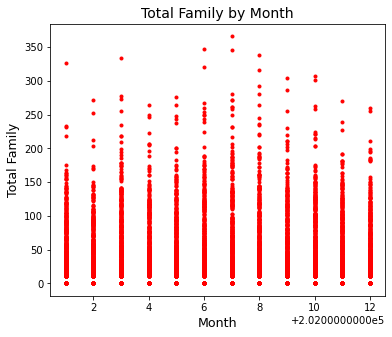

In [5]:
# ploting
plt.figure(figsize=(6, 5))
plt.plot(nc["YYYYMM"], nc["TOTAL FAMILY"], "r.")
plt.title("Total Family by Month", fontsize=14)
plt.xlabel("Month", fontsize=12.6)
plt.ylabel("Total Family", fontsize=12.6)

## Enplanements Data

Reflections
- From FAA's Air Carrier Activity database
- Collected for a calendar year
- One df for all commercial service airports and one df for all airports
- Only informative columns are enplanements for 2019, 2020, and % change
- Passenger boarding and all-cargo data is collected for a full calendar year and is used in calculating airport categories and entitlements for the next full fiscal year


In [6]:
df2= pd.read_csv(
    "../00_source_data/independent_datasets/change_of_add_2020.csv", low_memory=False
)
df2

,YYYYMM,ZIPCODE,CITY,STATE,TOTAL FROM ZIP,TOTAL BUSINESS,TOTAL FAMILY,TOTAL INDIVIDUAL,TOTAL PERM,TOTAL TEMP,TOTAL TO ZIP,TOTAL BUSINESS.1,TOTAL FAMILY.1,TOTAL INDIVIDUAL.1,TOTAL PERM.1,TOTAL TEMP.1
0,202001,"=""00601""",ADJUNTAS,PR,13,0,0,0,13,0,0,0,0,0,0,0
1,202001,"=""00602""",AGUADA,PR,25,0,0,16,25,0,40,0,0,27,34,0
2,202001,"=""00603""",AGUADILLA,PR,45,0,15,27,40,0,63,0,15,45,49,14
3,202001,"=""00605""",AGUADILLA,PR,13,0,0,0,12,0,18,0,0,12,17,0
4,202001,"=""00610""",ANASCO,PR,20,0,0,20,19,0,21,0,0,18,17,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289333,202012,"=""99901""",KETCHIKAN,AK,111,11,34,66,92,19,104,0,27,67,83,21
289334,202012,"=""99921""",CRAIG,AK,33,0,12,20,23,0,0,0,0,0,0,0
289335,202012,"=""99925""",KLAWOCK,AK,18,0,12,0,0,0,0,0,0,0,0,0
289336,202012,"=""99928""",WARD COVE,AK,13,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# checking how many NAs are in each column
for col2 in df2.columns:
    # printing the total number of NAs in each column
    na_sum2 = df2[col2].isna().sum()
    # printing number of NAs if not 0
    if na_sum2 != 0:
        print(col2, ":", df2[col2].isna().sum())

In [8]:
# subsetting for NC
nc2 = df2[df2["STATE"] == "NC"]
nc2

,YYYYMM,ZIPCODE,CITY,STATE,TOTAL FROM ZIP,TOTAL BUSINESS,TOTAL FAMILY,TOTAL INDIVIDUAL,TOTAL PERM,TOTAL TEMP,TOTAL TO ZIP,TOTAL BUSINESS.1,TOTAL FAMILY.1,TOTAL INDIVIDUAL.1,TOTAL PERM.1,TOTAL TEMP.1
5914,202001,"=""27006""",ADVANCE,NC,80,0,28,52,74,0,76,0,30,43,70,0
5915,202001,"=""27007""",ARARAT,NC,14,0,0,0,14,0,0,0,0,0,0,0
5916,202001,"=""27009""",BELEWS CREEK,NC,12,0,0,0,12,0,0,0,0,0,0,0
5917,202001,"=""27011""",BOONVILLE,NC,33,0,0,24,33,0,36,0,0,30,35,0
5918,202001,"=""27012""",CLEMMONS,NC,191,16,65,110,180,11,207,12,64,131,192,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272172,202012,"=""28902""",BRASSTOWN,NC,18,0,0,0,14,0,19,0,0,0,17,0
272173,202012,"=""28904""",HAYESVILLE,NC,87,0,48,32,58,29,90,0,41,47,75,15
272174,202012,"=""28905""",MARBLE,NC,26,0,0,21,21,0,24,0,0,17,20,0
272175,202012,"=""28906""",MURPHY,NC,209,0,88,114,140,69,198,11,64,123,155,43


Text(0, 0.5, 'Total Individuals')

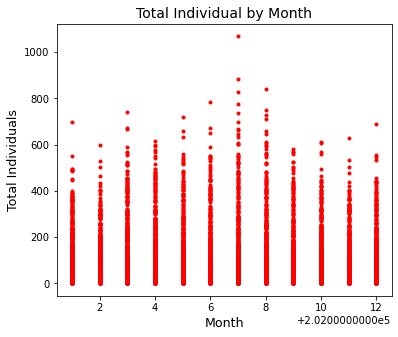

In [9]:
# ploting
plt.figure(figsize=(6, 5))
plt.plot(nc2["YYYYMM"], nc2["TOTAL INDIVIDUAL"], "r.")
plt.title("Total Individual by Month", fontsize=14)
plt.xlabel("Month", fontsize=12.6)
plt.ylabel("Total Individuals", fontsize=12.6)

Text(0, 0.5, 'Total Family')

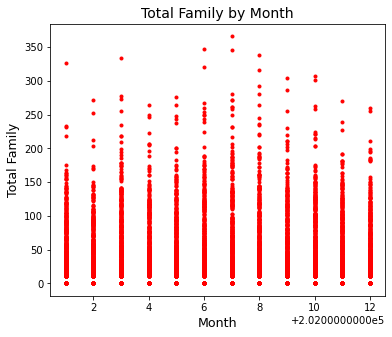

In [10]:
# ploting
plt.figure(figsize=(6, 5))
plt.plot(nc2["YYYYMM"], nc2["TOTAL FAMILY"], "r.")
plt.title("Total Family by Month", fontsize=14)
plt.xlabel("Month", fontsize=12.6)
plt.ylabel("Total Family", fontsize=12.6)

## Mortgage Data

Reflections
- Free
- Easy to access
- Annual (2007 to 2017 available so looked at 2010)
- Data is reported by financial institutions
- Only shows people that applied for mortgages
- A lot of columns are all Nas
- Has incomes and populations
- The data will tell you if the consumer got the mortgage—look for applications that were "originated“—or if the consumer was denied, didn't complete the application, or something else happened
- Has information about pre-approvals and loans sold from one institution to another. For each record, you can learn about the loan, the property characteristics, the applicant demographics, and the lender. 
- The data is modified to protect applicant and borrower privacy.


In [11]:
df3= pd.read_csv(
    "../00_source_data/independent_datasets/mortgages_2010.csv", low_memory=False
)
df3

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,...,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2010,0000000227,National Credit Union Administration,NCUA,5,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,14373,3658.0,2.49,50400.0,91.000000,1181.0,2535.0,0
1,2010,1461400001,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,352,3680.0,8.42,67200.0,187.979996,1321.0,1429.0,0
2,2010,0000066310,National Credit Union Administration,NCUA,5,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,847,7200.0,2.36,50400.0,124.339996,2824.0,4228.0,0
3,2010,56-1769429,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,2591,5727.0,9.46,67200.0,165.070007,1604.0,2068.0,0
4,2010,7197000003,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,188554,11821.0,7.41,50400.0,133.710007,4025.0,4731.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211442,2010,26-0595342,Department of Housing and Urban Development,HUD,7,VA-guaranteed,3,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,2622,5670.0,9.89,49500.0,120.300003,1658.0,2751.0,0
211443,2010,0000009846,Federal Deposit Insurance Corporation,FDIC,3,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,34478,8627.0,10.47,67200.0,108.940002,2715.0,3294.0,0
211444,2010,0000000001,Office of the Comptroller of the Currency,OCC,1,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,1374962,6080.0,9.65,67200.0,167.610001,1678.0,1887.0,0
211445,2010,0000000001,Office of the Comptroller of the Currency,OCC,1,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,534736,4494.0,8.30,67200.0,173.600006,1568.0,1658.0,0


In [12]:
# checking how many NAs are in each column
for col3 in df3.columns:
    # printing the total number of NAs in each column
    na_sum3 = df3[col3].isna().sum()
    # printing number of NAs if not 0
    if na_sum3 != 0:
        print(col3, ":", df3[col3].isna().sum())

msamd_name : 43180
msamd : 43180
county_name : 198
county_code : 198
census_tract_number : 348
applicant_race_name_2 : 210899
applicant_race_2 : 210899
applicant_race_name_3 : 211415
applicant_race_3 : 211415
applicant_race_name_4 : 211437
applicant_race_4 : 211437
applicant_race_name_5 : 211437
applicant_race_5 : 211437
co_applicant_race_name_2 : 211239
co_applicant_race_2 : 211239
co_applicant_race_name_3 : 211441
co_applicant_race_3 : 211441
co_applicant_race_name_4 : 211443
co_applicant_race_4 : 211443
co_applicant_race_name_5 : 211443
co_applicant_race_5 : 211443
applicant_income_000s : 15003
denial_reason_name_1 : 211447
denial_reason_1 : 211447
denial_reason_name_2 : 211447
denial_reason_2 : 211447
denial_reason_name_3 : 211447
denial_reason_3 : 211447
rate_spread : 205255
edit_status_name : 175757
edit_status : 175757
population : 349
minority_population : 349
hud_median_family_income : 348
tract_to_msamd_income : 351
number_of_owner_occupied_units : 383
number_of_1_to_4_family